# Supervised Learning

In the "Working with Data" notebook we emphasized the importance of understanding your data. The next step in designing a machine learning system is to __understand your task__. That is, what are you trying to accomplish with youe system? Do you have reason to believe that it can be done by a machine? In theory, if a human can perform some task, a machine can probably perform that task too. This statement comes with many caveats and considerations which we will continue to investigate.

In this notebook we will study a class of tasks called __supervised learning__. In supervised learning, the task is to predict an output given an input; in mathematical terms, any supervised learning algorithm simply tries to learn the following:

$$y = f(\vec{x})$$

Where $\vec{x}$ is the input, $y$ is the output, and $f(\vec{x})$ is the underlying relationship that we are trying to learn. We have already seen an example of such an input / output pair: the Iris dataset. In that dataset, the four features form the input and the species label is the output. We can then imagine a system that predicts the species of a flower based on it's four features, and in fact that's the first thing we'll do in this notebook. This particular task is called __classification__, because the output is a categorical or discrete variable; the other task we'll study is __regression__, in which the output is a continuous value.

In this case, we used the entire dataset; in general, however, we may not always do that. A dataset can have more than one type of label, or a lot of features that might not all be relevant. When selecting a dataset to perform a task, we also select which features and label(s) to use based on the task.

_Note: some code segments have TODO comments in them. These comments are optional exercises for you to modify the code in a useful way, however they are not meant to be restrictive. Feel free to modify the code in this notebook any way you like; it's a great way to practice your coding skills._

## Getting Started

You should have your own Anaconda virtual environment with all of the necessary Python modules installed. You can check by trying to import them:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn
import sklearn.datasets
import sklearn.ensemble
import sklearn.linear_model
import sklearn.metrics
import sklearn.model_selection
import sklearn.neighbors
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.svm

## Classification: Iris Dataset

Let's revisit the Iris dataset, but this time with a particular task in mind: to classify an Iris flower based on the four features of the Iris dataset. As a refresher, we'll load and display it in it's raw form:

In [2]:
# load the Iris dataset from seaborn, which provides the dataset as a pandas dataframe
iris = sns.load_dataset("iris")

# display the dataframe
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Now we need something that can perform the classification task... we need a machine learning algorithm! Specifically, we need a __classifier__. Let's go back to our mathematical formulation, but with one added detail:

$$y = f(\vec{x}; \vec{\theta})$$

Now we say that $f(\vec{x}; \vec{\theta})$ is our __model__, and $\vec{\theta}$ is the set of __parameters__ which define our model. This form is one of the most basic ways to describe pretty much any supervised learning algorithm. The important thing to understand is that $\theta$ can be __literally anything__; we can have as many parameters as we want, and we can arrange them into whatever mathematical expression we want. The learning algorithm (in this case, the classifier) that we choose will determine the structure of these parameters and how they are fitted to best perform the task. We won't explore the mathematical structure of every learning algorithm in these notebooks; for those details we refer you to several well-known resources which can be found on the course website. We only provide this basic formulation to aid your intuition.

So the learning algorithm that we choose will give us a model and a way to fit it to our task. There's one more thing: we need a way to __evaluate our model__. To do this, we'll split our dataset into two parts: a __training set__ which will be used to fit the model, and a __testing set__ which will be used to evaluate the model at the end. This procedure is pretty much the same regardless of what learning algorithm we use so let's go ahead and get it out of the way:

In [3]:
# load the Iris dataset from sklearn
iris = sklearn.datasets.load_iris()

# extract Iris data and labels
X = iris.data
y = iris.target

# split the Iris dataset into train and test sets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3)

# print shapes of train set and test set
print("X_train shape: (%d, %d)" % X_train.shape)
print("y_train shape: (%d,)" % y_train.shape)
print("X_test shape: (%d, %d)" % X_test.shape)
print("y_test shape: (%d,)" % y_test.shape)

X_train shape: (105, 4)
y_train shape: (105,)
X_test shape: (45, 4)
y_test shape: (45,)


The above code takes 30% of the dataset at random and uses it for the test set, while using the remaining 70% for the training set. It is common practice to use 20-30% of your data for the test set, so we will leave it as is for now.

### Logistic Regression 

One of the most basic classification algorithms is __logistic regression__. It's also a misnomer, as we'll see later, since regression is a different but related task. This algorithm has two distinct phases:

1. __Training__: In this phase we repeatedly show our model each sample (with it's label) from the training set, adjusting the model each time to make correct predictions.

2. __Prediction__: Once we have shown our model enough samples, we ask it to classify the samples from our test set, __which the model has not seen__. By measuring the percentage of samples that are predicted correctly, we can tell how well the model has learned the task.

Let's build a simple classifier using logistic regression to do our classification task. To help your understanding, we'll use just the first two features in Iris so that we can visualize how the classifier "thinks" about the data.

/home/zicew/.conda/envs/ci/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/zicew/.conda/envs/ci/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


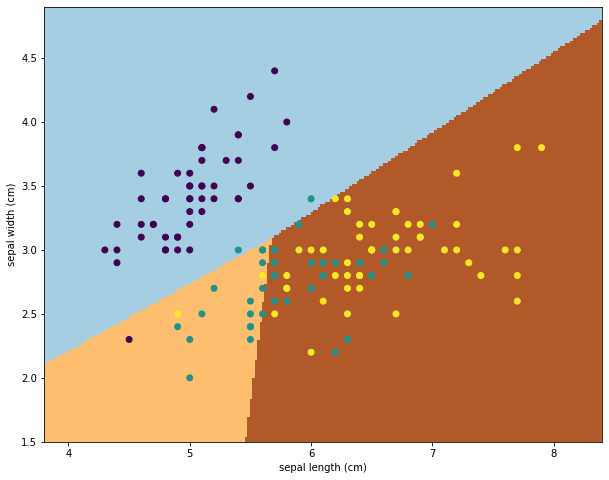

In [4]:
# create a logistic regressor
clf = sklearn.linear_model.LogisticRegression()

# "fit" the logistic regressor to the training set (phase 1)
# we use only the first two features for visualization purposes
clf.fit(X_train[:, [0, 1]], y_train) 

# create a grid of the 2D space in which our training data resides
x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
step_size = 0.02

xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

# use the logistic regressor to classify the entire grid
# c_ concatenates two arrays, and ravel converts a 2-d (or n-d) array to 1-d array
preds = clf.predict(np.c_[xx.ravel(), yy.ravel()])
preds = preds.reshape(xx.shape) 

# plot the grid of predictions
plt.figure(1, figsize=(10, 8))
plt.pcolormesh(xx, yy, preds, cmap=plt.cm.Paired)

# plot the Iris dataset
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

plt.show()

The above plot shows you how the logistic regression model approaches the classification task -- it essentially tries to draw straight lines between the three classes in order to separate them. The data points are colored according to their true label so that we can see how well they are separated. It looks like two of the classes are mixed up too much for us to be able to separate them with a straight line. We've seen this before in the Iris dataset. In other words, the data is not __linearly separable__, at least not with these two dimensions.

Let's take the above code and put it into a function so that you can repeat this visualization for other pairs of features in Iris:

In [5]:
def plot_decision_space(iris, i, j, clf):
    """
    Train a logistic regression classifier on Iris using features i and j,
    and plot the dataset with the decision boundaries created by the
    classifier.
    
    Args:
    iris: Iris dataset
    i, j: column indices to use from Iris
    clf: classifier to use
    """
    # split the Iris dataset into train and test sets
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(iris.data, iris.target, test_size=0.3)
    
    # your code here
    pass

# plot a decision space for several classifiers
classifiers = [
    ("knn", sklearn.neighbors.KNeighborsClassifier()),
    ("lr", sklearn.linear_model.LogisticRegression()),
    ("rf", sklearn.ensemble.RandomForestClassifier()),
    ("svm", sklearn.svm.SVC())
]

for name, clf in classifiers:
    print(name)
    plot_decision_space(iris, 0, 1, clf)

knn
lr
rf
svm


Can you find different feature pairs which can be separated more easily? Even if you can't, remember that we're only using two of the four available features in Iris. The next logical step is to train the classifier with all four features, but we'll leave that for you to try on your own. For now, let's move on to another classifier and take a deeper look at our classification task.

### k-Nearest Neighbors

The next classifier we'll try is called __k-nearest neighbors (kNN)__. Here's how it works: save all of the training samples and their labels, and then when performing classification, label a test sample according to the labels of it's $k$ nearest neighbors in the training set. There are two choices we have to make with this algorithm in order to use it:
1. The number of neighbors $k$.
2. The distance function, which is used to find the "nearest neighbors" of a sample.

When $k$ is more than 1, the predicted label is determined by majority vote of the $k$ nearest neighbors. The distance function takes two samples and outputs some measure of "distance" between them. We'll start by using $k = 1$ and Euclidean distance:

$$d(\vec{x}, \vec{y}) = ||\vec{x} - \vec{y}||_2$$

Now let's see how well a kNN model can perform classification on the Iris dataset:

In [6]:
# initialize k-NN model (k = 1)
knn = sklearn.neighbors.KNeighborsClassifier(1)

# fit the model to the training data
knn.fit(X_train, y_train)

# predict labels for the test data
y_pred = knn.predict(X_test)

# compare the predicted labels to the ground truth labels
accuracy = sum(y_pred == y_test) / len(y_test)

print("%0.2f" % accuracy)

0.91


The above code should output a single number between 0 and 1; this number is the __accuracy__, or the fraction of test samples that were classified correctly. You should get something at or around 0.96, which would mean that the kNN classifier was correct 96% of the time.

Is 96% good enough? Once again, that depends entirely on your task, or what you are trying to accomplish. For example, 96% is usually good enough to get the best grade in a class, most people would probably not trust a surgeon who performs well 96% of the time, or an airplane pilot who flies correctly 96% of the time. Furthermore, accuracy is only one example of an __evaluation metric__; there are many other metrics, and although accuracy is one of the easiest to understand intuitively, it is not always the best way to evaluate a model's performance. Later on we will explore some other metrics.

Anyway, let's see how kNN performs on Iris as we change the value of $k$. In our usual fashion we'll write a function and experiment with it:

In [7]:
# define a function to evaluate kNN
def evaluate_knn(k=1):
    # initialize k-NN model
    knn = sklearn.neighbors.KNeighborsClassifier(k)

    # fit the model to the training data
    knn.fit(X_train, y_train)

    # predict labels for the test data
    y_pred = knn.predict(X_test)

    # compare the predicted labels to the ground truth labels
    accuracy = sum(y_pred == y_test) / len(y_test)

    return accuracy

# evaluate kNN for several values of k
k_values = [1, 2, 3, 4, 5]

for k in k_values:
    accuracy = evaluate_knn(k)
    
    print("k = %d: %0.2f" % (k, accuracy))

k = 1: 0.91
k = 2: 0.91
k = 3: 0.91
k = 4: 0.91
k = 5: 0.93


The value $k$ in KNN is an example of what we call a __hyperparameter__. A hyperparameter is like a parameter, except we have to set it ourselves; the model cannot learn a hyperparameter on its own. The distance metric is also a hyperparameter; it is a function that we have to choose. Another very important aspect of designing a machine learning system is to pick the best hyperparameter values, or the values for which the system best performs the task.

What we just did is called a __hyperparameter search__ on $k$, and it is the most straightforward way to find the best hyperparameter setting, although it may not always be the most efficient. Keep in mind that we have to train and test the kNN model _every time_ we try a new value of $k$. If we really wanted to be exhaustive with our search, it might take a while. One way to search a large space more efficiently is to search across _orders of magnitude_, like this:

In [8]:
# evaluate kNN for several values of k
k_values = [1, 3, 10, 30, 100]

for k in k_values:
    accuracy = evaluate_knn(k)
    
    print("k = %3d: %0.2f" % (k, accuracy))

k =   1: 0.91
k =   3: 0.91
k =  10: 0.93
k =  30: 0.89
k = 100: 0.40


__Question__: What is the range of possible values for $k$?

In the above code, we essentially search through each "half-order" of magnitude. This method allows us to quickly sample a large search space, identify the neighborhoods that give the best results, and "zoom in" on those neighborhoods to find a more exact value. Try this with your own results!

### Other Classification Metrics

Earlier we introduced accuracy as an example of an evaluation metric. While accuracy is easy to understand and compute, it's not always the best metric for classification. In particular, accuracy is not as useful when the dataset is __imbalanced__, that is, when the classes are not evenly sized. As an example, imagine that you had a dataset of patients, 99% of which are healthy and 1% of which have some disease. You could create a classifier which just always outputs "healthy" and that classifier would achieve 99% accuracy! With this kind of dataset, it is not enough to consider the overall accuracy; we must also consider how well the model identifies each class. We can visualize these "class-specific" accuracies with a confusion matrix:

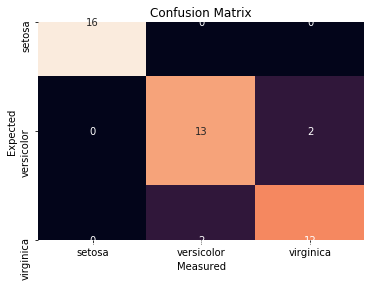

In [9]:
classes = iris.target_names

# create a k-NN model
knn = sklearn.neighbors.KNeighborsClassifier(1)
knn.fit(X_train, y_train)

# predict labels for the test data
y_pred = knn.predict(X_test)

# compute confusion matrix for the ground truth and predicted labels
cnf_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)

# plot a heatmap of the confusion matrix
sns.heatmap(cnf_matrix, annot=True, fmt="d", cbar=False, square=True, xticklabels=classes, yticklabels=classes)
plt.ylabel("Expected")
plt.xlabel("Measured")
plt.title("Confusion Matrix")
plt.show()

If the classifier achieved 100% accuracy, the confusion matrix would be completely light along the diagonal and completely dark everywhere else. When the classifier makes mistakes, now we can see where it makes them. Lastly, we can condense all of this information into a single value using the __F1 score__:

In [10]:
print("accuracy: %0.2f" % (sklearn.metrics.accuracy_score(y_test, y_pred)))
print("f1 score: %0.2f" % (sklearn.metrics.f1_score(y_test, y_pred, average="weighted")))

accuracy: 0.91
f1 score: 0.91


As you can see, the accuracy and F1 scores are very similar for the Iris classifier. Whenever the dataset is balanced (which Iris is), the F1 score tends to be similar to the accuracy. Feel free to try these metrics on the next classification dataset and other toy datasets.

## Classification: Breast Cancer Dataset

As it turns out, the Iris dataset is a really simple dataset, which makes it easy to classify, so let's move on to something more challenging. We're going to look at the [UCI ML Breast Cancer Wisconsin dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). You may have already looked at this dataset on your own in the "Working with Data" notebook, because it's provided by scikit-learn:

In [11]:
# load the Breast Cancer dataset
bc = sklearn.datasets.load_breast_cancer()

# print dataset stats
print("X: (%d, %d)" % bc.data.shape)
print("y: (%d,)" % bc.target.shape)
print("label names: ", bc.target_names)

# TODO: create a dataframe with the data, labels, and column names so that you can view everything at once

X: (569, 30)
y: (569,)
label names:  ['malignant' 'benign']


This dataset is significantly larger than Iris; in addition to having hundreds of more samples, it has way more features. However, it is simpler in that it has fewer labels: each sample, or tumor, is either malignant or benign. This type of classification is called __binary classification__, and it is the simplest kind of classification we can do.

Before we get ahead of ourselves, let's try to visualize the data in some way. It won't be as easy as Iris since we now have 30 features, but one thing we can always do is look at the distributions of invidual features. For that we'll use a `violinplot`:

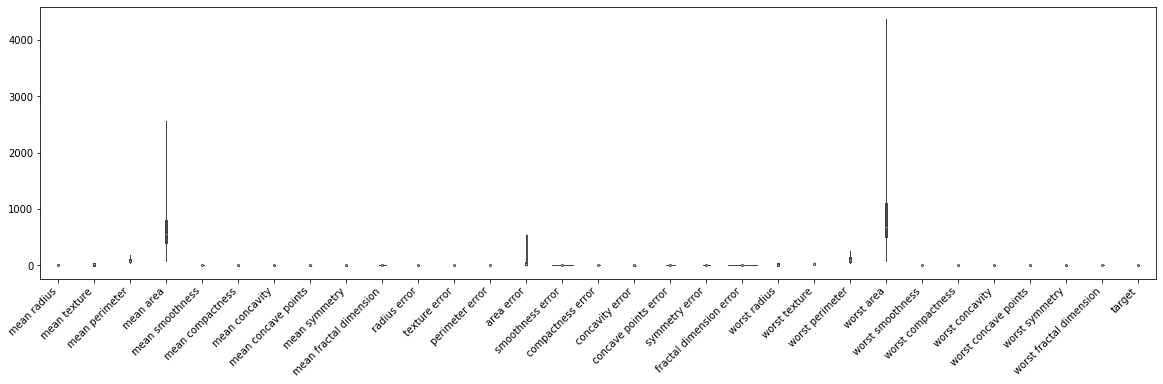

In [12]:
# define a helper function for the violinplot
def rotate_xticklabels(angle):
    for tick in plt.gca().get_xticklabels():
        tick.set_horizontalalignment("right")
        tick.set_rotation(angle)

# create a dataframe for breast cancer dataset
df = pd.DataFrame(data=np.c_[bc.data, bc.target], columns=np.append(bc.feature_names, ["target"]))

# plot distributions of each feature
plt.subplots(1, figsize=(20, 5))
sns.violinplot(data=df, bw=0.2, cut=1, linewidth=1)
rotate_xticklabels(45)

Although it's still hard to view with 30 features, we can broadly see what each feature looks like. It looks like all of the values are positive, and a few features are spread out _way more_ than the rest.

### k-Nearest Neighbors

Let's go ahead and try our kNN code:

In [13]:
# create train and test sets
X = bc.data
y = bc.target
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3)

# evaluate kNN for several values of k
k_values = [1, 3, 10, 30, 100]

for k in k_values:
    accuracy = evaluate_knn(k)
    
    print("k = %3d: %0.2f" % (k, accuracy))

k =   1: 0.88
k =   3: 0.92
k =  10: 0.89
k =  30: 0.87
k = 100: 0.86


Your results should vary from 90-95%, not quite as good as with Iris. How can we do better? There is one thing: remember how some of the breast cancer features had really high variance? As it turns out, this phenomenon actually throws off most supervised learning algorithms, because it causes them to pay more attention to the high-variance features and less attention to the low-variance features, which might be just as important. Therefore, it is common practice to __scale each feature to have zero mean and unit variance__. That way, the learning algorithm will pay equal attention to each feature.

__Question__: In the case of kNN, how would a high-variance feature receive "more attention"? _Hint: think about the distance function._

Here is where the variance of features comes into play: when features in a dataset don't have the same scale, it actually "throws off" most supervised learning algorithms. This scaling is an example of __preprocessing__ our data, or transforming it in some way before feeding it to a machine learning model. With scikit-learn we can scale our data with a single function call:

In [14]:
# fetch breast cancer data and labels
X = bc.data
y = bc.target

# normalize each feature to have zero mean, unit variance
X = sklearn.preprocessing.scale(X)

# create train and test sets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3)

# evaluate kNN for several values of k
k_values = [1, 3, 10, 30, 100]

for k in k_values:
    accuracy = evaluate_knn(k)

    print("k = %3d: %0.2f" % (k, accuracy))

# TODO: change evaluate_knn() to use a different distance metric for kNN, see if that improves accuracy

k =   1: 0.94
k =   3: 0.96
k =  10: 0.96
k =  30: 0.94
k = 100: 0.92


Well... I guess it's a little better. It's kind of hard to tell right now because the results vary slightly from run to run. Either way, between scaling our data and finding the best hyperparameter settings, there isn't much more that we can do to make kNN perform better on the breast cancer data. We have one more option: try a different learning algorithm.

### Support Vector Machines

The last classifier we'll try is called a __support vector machine (SVM)__, an especially powerful tool for supervised learning. SVM has two main hyperparameters: the regularization constant $C$, and the kernel function. For more details on how these hyperparameters work, we refer you to the [scikit-learn documentation](http://scikit-learn.org/stable/modules/svm.html), but we'll give you these tips:
- The default value of 1 is a good starting point for $C$
- The primary options for the kernel are the linear kernel (`"linear"`) and RBF kernel (`"rbf"`). The RBF kernel will probably classify better.

The good thing is that we won't have to change much to use an SVM. Let's review the steps we've developed up to this point for evaluating a model:

1. Pick a dataset
2. Scale dataset to zero mean and unit variance
3. Split dataset into train set and test set
4. Initialize a model with hyperparameter settings
5. Fit model to train set
6. Evaluate model on test set

Notice that the "model" can be any classifier, not just kNN, so if we want to use an SVM, we just have to replace kNN with SVM in our code. We'll leave it to you to experiment with the SVM, using the techniques we've develoepd so far, to see how much accuracy you can achieve on the Breast Cancer dataset.

In [15]:
# define a function to evaluate an SVM
def evaluate_svm(C, kernel):
    # initialize SVM model
    svm = sklearn.svm.SVC(C=C, kernel=kernel)

    # fit the model to the training data
    svm.fit(X_train, y_train)

    # predict labels for the test data
    y_pred = svm.predict(X_test)

    # compare the predicted labels to the ground truth labels
    accuracy = sum(y_pred == y_test) / len(y_test)

    return accuracy

# evaluate SVM for specific values of C and kernel
C = 1.0
kernel = "linear"

accuracy = evaluate_svm(C, kernel)

# print results
print("%0.2f" % (accuracy))

# TODO: perform hyperparameter search on C and kernel

0.96


## Regression: Boston Housing Prices

Now that we've studied classification, the other side of supervised learning will be very easy to cover. The only thing that changes in __regression__ is the nature of the output, namely, that the output is a __real number__ rather than a __category__. A classic example of a regression task is to predict housing prices based on features of a house, and it turns out that scikit-learn has such a dataset among its toy datasets, the Boston house-prices dataset.

As always, let's look at the dataset first:

In [ ]:
# load the Boston house-prices dataset
boston = sklearn.datasets.load_boston()

# print dataset stats
print("X: (%d, %d)" % boston.data.shape)
print("y: (%d,)" % boston.target.shape)

# create a dataframe for Boston dataset
df = pd.DataFrame(data=np.c_[boston.data, boston.target], columns=np.append(boston.feature_names, ["target"]))

# show dataframe
df

# TODO: create a violinplot or other visualizations of the dataset

That's a lot of numbers... what do they all mean? As with the Breast Cancer data, we may not be able to tell immediately what each feature means, for that we would need to consult the dataset source. Fortunately for us, machine learning algorithms don't care about what the features _mean_, they only see the numbers. So we will continue forward, but remember that any specific knowledge about your data can help you make better decisions about your machine learning system.

### Linear Regression

Probably one of the simplest regression algorithms is __linear regression__. It's so simple, we'll even show you the formula right here. Linear regression assumes that the output value is just a weighted sum of the features:

$$y = f(\vec{x}; \vec{\theta}) = f(\vec{x}; \vec{w}) = w_1 x_1 + w_2 x_2 + ... + w_n x_n$$

Linear regression has a training and prediction phase, just like all of our classifiers, so the code is quite similar:

In [ ]:
# fetch Boston house-prices data and target
X = boston.data
y = boston.target

# normalize each feature to have zero mean, unit variance
X = sklearn.preprocessing.scale(X)

# create train and test sets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3)

# initialize linear regression model
model = sklearn.linear_model.LinearRegression()

# fit the model to the training data
model.fit(X_train, y_train)

# predict output for the test data
y_pred = model.predict(X_test)

Well that was easy, but... how do we evaluate the model? The answers are real numbers, not categories, so we can't just count the number of matches. We need a way to measure how _close_ the model gets to the training data. How about this: let's plot the predictions _against_ the ground truth to see how closely they match. If the model performs well, we should see something close to a straight line:

In [ ]:
# plot correlation of expected and predicted output
limits = (min(min(y_test), min(y_pred)), max(max(y_test), max(y_pred)))

sns.jointplot(y_test, y_pred, kind="reg", xlim=limits, ylim=limits)
plt.xlabel("Expected")
plt.ylabel("Measured")
plt.show()

Not quite a straight line, but pretty close! What we are essentially measuring is the __correlation__ between the ground truth and the model predictions. In fact, while we can measure the correlation, there are two other metrics, the __explained variance score__ and the __coefficient of determination__ (also known as $r^2$ score), which are considered to be better regression metrics. Here's how to compute all three of them with scikit-learn:

In [ ]:
r, p = scipy.stats.pearsonr(y_test, y_pred)
ev = sklearn.metrics.explained_variance_score(y_test, y_pred)
r2 = sklearn.metrics.r2_score(y_test, y_pred)

print("r   = %0.3f" % (r))
print("ev  = %0.3f" % (ev))
print("r^2 = %0.3f" % (r2))

While the correlation ranges from -1 to 1, the explained variance and $r^2$ scores both range from $-\infty$ to 1. But in all three cases, higher is better. So now, as with accuracy for classification, we can use any of these metrics to evaluate our regression models and find the best model for the task. Of course, linear regression doesn't have any hyperparameters so there isn't much more we can do here...

### Linear Regression: Polynomial Features

In the same way that logistic regression tries to separate the data with straight lines, linear regression essentially tries to fit the data to a straight line. What if the data isn't on a straight line? What if it has curves? It turns out we can also approximate curves with linear regression using __polynomial features__. That is, we compute polynomial terms from our features ($x_1^2, x_1^3, x_1 x_2$, etc.) and use them like regular features in our model. Check out the [scikit-learn documentation](http://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions) for a full explanation.

__Question__: Are we still doing linear regression if we use polynomial features?

For now, we'll simply develop the code to use polynomial features and see if it does better:

In [ ]:
# create a linear regression model with polynomial features
model = sklearn.pipeline.Pipeline([
    ("poly", sklearn.preprocessing.PolynomialFeatures(degree=2)),
    ("linear", sklearn.linear_model.LinearRegression(fit_intercept=False))
])

# TODO: experiment with the degree parameter

# fit the model to the training data
model.fit(X_train, y_train)

# predict output for the test data
y_pred = model.predict(X_test)

# compute the explained variance score for the model
ev = sklearn.metrics.explained_variance_score(y_test, y_pred)

print("ev  = %0.3f" % (ev))

# TODO: create a correlation plot for this model

Looks like the polynomial features helped. Notice that we didn't actually change the model, we only changed the input features to the model. To make things easier we use the `Pipeline` in scikit-learn so that we can just provide the original data and the polynomial features are automatically computed and passed to the model. The only small change is that we disable the y-intercept in the linear regression model because `PolynomialFeatures` actually creates this intercept term as well.

Notice also that you can control the number of polynomial features with the `degree` parameter. Since we specified `degree=2`, only the second-order features are created. Here's an experiment: change `degree` to generate even higher-order features, and see if the model performs any better.

### SVM Regression

Wait, why are we looking at the SVM again? I thought SVM could only do classification? It turns out that SVM can do both! In fact, SVM regression is quite handy in a number of applications, such as predicting bounding boxes for object detection. Since the code is virtually the same as for linear regression, we'll let you try it on your own:

In [ ]:
# initialize SVM regression model
model = sklearn.svm.SVR(kernel="rbf")

# your code here

## Cross-validation

In the classification and regression examples above, we always created a training set and testing set so that we could evaluate each model on unseen data. Withholding data in this manner is a critical aspect of supervised learning because the entire goal of a supervised learning system is to understand a task given a finite number of examples. If we evaluated a model with data it had already seen, we would quickly run the risk of __overfitting__, in which a model essentially memorizes the training set and fails to learn the actual task.

However, there's another bad practice which can lead to overfitting, and we've been doing it throughout this notebook: when we perform hyperparameter search, we've been using the test set to evaluate each model variant, which means that we could potentially overfit _on the test set_. To deal with this problem, we'll have to split our dataset three ways: a training set, a __validation set__, and a testing set. That's a lot of splits, especially for a small dataset, so we use a technique called __cross-validation (CV)__ to make our dataset go a little further. With cross-validation, we will still only create a training set and testing set, but we'll split the training set into __folds__, or equally sized partitions. Then, when we evaluate a model with a particular hyperparameter setting, we'll actually train and evaluate it several times, using a different fold each time as the validation set, and average the scores. This particular method is called __k-fold cross-validation__, and it allows us to compare models without ever touching the test set.

Let's just take the first hyperparameter search that we did in this notebook and redo it:

In [ ]:
# load the Iris dataset
iris = sklearn.datasets.load_iris()

# extract data and labels
X = iris.data
y = iris.target

# split the dataset into train and test sets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3)

# evaluate kNN for several values of k
k_values = [1, 2, 3, 4, 5]

for k in k_values:
    # evaluate model using 5-fold cross-validation
    knn = sklearn.neighbors.KNeighborsClassifier(k)
    scores = sklearn.model_selection.cross_val_score(knn, X_train, y_train, cv=5, n_jobs=-1)
    
    print("k = %d: %0.2f +/- %0.2f" % (k, scores.mean(), scores.std()))

Cross-validation is really easy to use in scikit-learn. Furthermore, it's useful not only for selecting hyperparameters, but also for selecting algorithms! Here's a simple example where we compare all of the classifiers discussed in this notebook on the Breast Cancer dataset:

In [ ]:
# load the Breast Cancer dataset
bc = sklearn.datasets.load_breast_cancer()

# extract data and labels
X = bc.data
y = bc.target

# split the dataset into train and test sets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3)

# evaluate several classifiers on the training set
models = [
    ("lr", sklearn.linear_model.LogisticRegression()),
    ("knn", sklearn.neighbors.KNeighborsClassifier(1)),
    ("rf", sklearn.ensemble.RandomForestClassifier()),
    ("svm", sklearn.svm.SVC(kernel="linear"))
]

for name, clf in models:
    # evaluate model using 5-fold cross-validation
    scores = sklearn.model_selection.cross_val_score(clf, X_train, y_train, cv=5, n_jobs=-1)
    
    print("%8s: %0.2f +/- %0.2f" % (name, scores.mean(), scores.std()))

# TODO: expand this code to compare hyperparameters and algorithms!

## Assignment: How High Can You Go

This assignment is essentially an extension of what you did in the previous notebook: pick a toy dataset from [scikit-learn](http://scikit-learn.org/stable/datasets/index.html#toy-datasets) or [seaborn](http://seaborn.pydata.org/generated/seaborn.load_dataset.html#seaborn.load_dataset), even the same one you used from before, and train a classifier or regressor on the dataset. Your goal is to get the highest accuracy possible, using any of the algorithms and techniques we've developed in this notebook. Keep in mind some of the questions you should be asking yourself:
- Are the labels __categorical__ or __numerical__ (classification or regression)?
- Which algorithm performs the best?
- Which hyperparameter settings work best for each algorithm?

Note that all of the previously-developed techniques for understanding your data still apply here.